In [1]:
from pyprojroot import here
import json
import os
data_dir = here("data/papers/Li-Mn-O")

files = os.listdir(data_dir)
files = [f for f in files if f.endswith('_synthesis_and_challenges.json')]

print("Files:", files)
#
challenge_texts = []
solution_texts = []
materials_names = []
stages = []

# Loop through each file and extract the relevant information
for file in files:
    input_file = os.path.join(data_dir, file)

    with open(input_file, "r", encoding="utf-8") as f:
        synthesis_data = json.load(f)

    challenges_info = synthesis_data.get("challenges_info", [])

    # identoify all unuque stages
    unique_stages = set()
    for c in challenges_info:
        unique_stages.add(c.get("stage"))
print("Unique stages in file", unique_stages)



Files: ['Zeitschrift anorg allge chemie - September 1975 - Hoppe - Zur Kenntnis der Oxomanganate III     ber LiMnO2 und  ‐NaMnO2  1_synthesis_and_challenges.json', 'pang-et-al-2017-effects-of-fluorine-and-chromium-doping-on-the-performance-of-lithium-rich-li1-xmo2-(m-ni-mn-co)_synthesis_and_challenges.json', '1-s2.0-S0167273806002165-main_synthesis_and_challenges.json', '1-s2.0-S0167273899002350-main_synthesis_and_challenges.json', 'liu-et-al-2019-unified-view-of-the-local-cation-ordered-state-in-inverse-spinel-oxides_synthesis_and_challenges.json', '1-s2.0-002245969580034M-main_synthesis_and_challenges.json', 'c5ce02358k_synthesis_and_challenges.json', '1-s2.0-S0097848500000607-main_synthesis_and_challenges.json', '1-s2.0-S0022459697973667-main_synthesis_and_challenges.json', '1-s2.0-S0167273809003646-main_synthesis_and_challenges.json', '1-s2.0-S0925838805003890-main_synthesis_and_challenges.json', 'akimoto-et-al-2000-single-crystal-x-ray-diffraction-study-of-the-spinel-type-limn2o4_

In [2]:
from pyprojroot import here
import json
import os
data_dir = here("data/papers/Li-Mn-O")

files = os.listdir(data_dir)
files = [f for f in files if f.endswith('_synthesis_and_challenges.json')]

print("Files:", files)
#
challenge_texts = []
solution_texts = []
materials_names = []
stages = []
challenge_stage = 'testing'

# Loop through each file and extract the relevant information
for file in files:
    input_file = os.path.join(data_dir, file)

    with open(input_file, "r", encoding="utf-8") as f:
        synthesis_data = json.load(f)

    challenges_info = synthesis_data.get("challenges_info", [])

    # Prepare challenge and solution texts
    for c in challenges_info:
        if c.get("stage") == challenge_stage:
            challenge_texts.append(c.get("challenge", {}).get("description", "") + " "  + c.get("challenge", {}).get("impact", ""))
            solution_texts.append(c.get("solution", {}).get("description", "") + " " + c.get("solution", {}).get("methodology", ""))
            materials_names.append(c.get("material", ""))
            stages.append(c.get("stage", ""))
    

print("Num. of materials:", len(materials_names), "Materials:", materials_names)
print("Num. of stages:", len(stages), "Stages:", stages)
print("Num. of challenges:", len(challenge_texts), "Challenges:", challenge_texts)
print("Num. of solutions:", len(solution_texts), "Solutions:", solution_texts)

Files: ['Zeitschrift anorg allge chemie - September 1975 - Hoppe - Zur Kenntnis der Oxomanganate III     ber LiMnO2 und  ‐NaMnO2  1_synthesis_and_challenges.json', 'pang-et-al-2017-effects-of-fluorine-and-chromium-doping-on-the-performance-of-lithium-rich-li1-xmo2-(m-ni-mn-co)_synthesis_and_challenges.json', '1-s2.0-S0167273806002165-main_synthesis_and_challenges.json', '1-s2.0-S0167273899002350-main_synthesis_and_challenges.json', 'liu-et-al-2019-unified-view-of-the-local-cation-ordered-state-in-inverse-spinel-oxides_synthesis_and_challenges.json', '1-s2.0-002245969580034M-main_synthesis_and_challenges.json', 'c5ce02358k_synthesis_and_challenges.json', '1-s2.0-S0097848500000607-main_synthesis_and_challenges.json', '1-s2.0-S0022459697973667-main_synthesis_and_challenges.json', '1-s2.0-S0167273809003646-main_synthesis_and_challenges.json', '1-s2.0-S0925838805003890-main_synthesis_and_challenges.json', 'akimoto-et-al-2000-single-crystal-x-ray-diffraction-study-of-the-spinel-type-limn2o4_

# Categorize challenges using Azure Openai API

In [3]:
# Load environment variables from .env file
import dotenv
dotenv.load_dotenv()

# Set Azure OpenAI credentials
AZURE_OPENAI_API_KEY = os.getenv("AZURE_OPENAI_API_KEY")
AZURE_OPENAI_ENDPOINT = os.getenv("AZURE_OPENAI_ENDPOINT")
AZURE_EMBEDDING_DEPLOYMENT_NAME = os.getenv("AZURE_EMBEDDING_DEPLOYMENT_NAME") # Deployment name
AZURE_EMBEDDING_MODEL_NAME = os.getenv("AZURE_EMBEDDING_MODEL_NAME")  # Model name
AZURE_EMBEDDING_MODEL_VERSION = os.getenv("AZURE_EMBEDDING_MODEL_VERSION")  # Model version
AZURE_OPENAI_API_VERSION = os.getenv("AZURE_OPENAI_API_VERSION")
AZURE_MODEL_DEPLOYMENT_NAME = os.getenv("AZURE_MODEL_DEPLOYMENT_NAME")  # Deployment name

In [4]:
import sys
from pathlib import Path
from pyprojroot import here

# Get the root directory of the project
root_dir = here()
print("Root directory:", root_dir)

# Add the parent directory (project root) to the Python path so 'prompts' can be imported
sys.path.append(str(root_dir))
print("Python path:", sys.path)

# Import the prompts
from prompts.challenge_categorization import CHALLENGE_COMBINED_PROMPT
from prompts.challenge_categorization import CHALLENGE_CATEGORY_IDENTIFICATION_PROMPT
from prompts.challenge_categorization import CHALLENGE_CATEGORIZATION_PROMPT



Root directory: /Users/arashkhajeh/GitHub/LLM-for-Materials
Python path: ['/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python312.zip', '/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12', '/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/lib-dynload', '', '/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages', '/Users/arashkhajeh/GitHub/MMMM/src', '/Users/arashkhajeh/GitHub/LLM-for-Materials']


In [44]:
import os
import json
from langchain_openai import ChatOpenAI, AzureChatOpenAI
from langchain_core.messages import HumanMessage, SystemMessage

def categorize_challenges(
                       challenge_texts: list,
                       challenge_stage: str = "synthesis",
                       api_key: str = None,  
                       azure: bool = True, 
                       model_name: str = None, 
                       temp: float = 0, 
                       azure_api_version: str = None, 
                       azure_endpoint: str = None) -> json:
    """
    Categorize(cluster) extracted challenges into different categories(clusters).

    Parameters:
        challenges_text (list): List of challenges to categorize.
        api_key (str): OpenAI API key.
        azure (bool): Flag to indicate if Azure OpenAI service should be used.
        model_name (str, optional): The name of the Azure deployment or openai model name. Defaults to None.
        temp (float, optional): The temperature for the model. Defaults to 0.   
        azure_api_version (str, optional): The API version for Azure OpenAI service. Defaults to None.
        azure_endpoint (str, optional): The endpoint for Azure OpenAI service. Defaults to None.
        azure_api_version (str): The API version for Azure OpenAI service. Defaults to None.
        
    Returns:
        json: JSON object containing the the categorized challenges.
    """
    if not azure:
        llm = ChatOpenAI(model_name=model_name or os.getenv("OPENAI_MODEL_NAME"),  # Replace with your OpenAI model name
                         temperature=temp, 
                         openai_api_key=api_key or os.getenv("OPENAI_API_KEY"))
    else:
        llm = AzureChatOpenAI(
            azure_deployment=model_name or os.getenv("AZURE_MODEL_DEPLOYMENT_NAME"),  # Replace with your Azure deployment name
            api_version=azure_api_version or os.getenv("AZURE_OPENAI_API_VERSION"),
            temperature=temp or 0,
            openai_api_key=api_key or os.getenv("AZURE_OPENAI_API_KEY"),
            azure_endpoint=azure_endpoint or os.getenv("AZURE_OPENAI_ENDPOINT")  # Explicitly pass the endpoint
        )

    challenges_prompt = CHALLENGE_COMBINED_PROMPT.format(
        challenge_texts=challenge_texts,
        challenge_stage=challenge_stage
    )

    system_msg = SystemMessage(content="You are a helpful and precise materials scientist. ")
    response = llm.invoke([
    system_msg,
    HumanMessage(content=challenges_prompt)
    ])

    # Separate the JSON part of the response
    try:
        json_start = response.content.index("{")
        json_end = response.content.rindex("}") + 1
        json_str = response.content[json_start:json_end]
    except ValueError:
        raise ValueError("Failed to extract JSON from LLM response. Check the response format.")

    try:
        extracted_output = json.loads(json_str)
    except json.JSONDecodeError as e:
        raise ValueError(f"Failed to parse LLM response as JSON: {json_str}") from e

    return extracted_output


In [45]:

# Categorize the challenges
categorized_challenges = categorize_challenges(challenge_texts=challenge_texts,
                                               challenge_stage=challenge_stage,
                                                api_key=AZURE_OPENAI_API_KEY,
                                                azure=True,
                                                model_name=AZURE_MODEL_DEPLOYMENT_NAME,
                                                temp=0.0,
                                                azure_api_version=AZURE_OPENAI_API_VERSION,
                                                azure_endpoint=AZURE_OPENAI_ENDPOINT)
print("Categories:", categorized_challenges)
print("Num. of categories:", len(categorized_challenges))

Categories: {'Impurities and Composition Effects': ['Degradation of electrochemical performance due to Mn3O4 impurity. Lower specific capacity and rate capability in battery applications.', 'Discharge capacity reduces upon doping with Fe and Mg. Limits the energy storage capacity of the material, which is a key performance metric for battery applications.', "Decrease in discharge capacity (Qdis) at higher Co content (x = 1). The reduced capacity limits the material's effectiveness as a high-energy-density electrode.", 'Decreased electrical conductivity with increasing titanium content. Lower electrical conductivity can reduce the efficiency of the electrode material in battery applications.'], 'Structural and Phase Stability': ["Irreversible structural change during the first charge process, transforming orthorhombic HT-LiMnO2 into a new phase (Phase II). This structural change affects the electrochemical properties and limits the material's initial discharge capacity.", 'Irreversible 

In [5]:
def evaluate_and_save_categorized_items(text_items, categorized_items, output_file_path):
    # Check missing items
    missing_items = []
    for item in text_items:
        found = False
        for category, items in categorized_items.items():
            if item in items:
                found = True
                break
        if not found:
            missing_items.append(item)
    print("Num. of missing items:", len(missing_items))
    print("Missing items:", missing_items)

    # Check for duplicates
    duplicates = {}
    for category, items in categorized_items.items():
        seen = set()
        for item in items:
            if item in seen:
                if category not in duplicates:
                    duplicates[category] = []
                duplicates[category].append(item)
            else:
                seen.add(item)
    print("Duplicates:", duplicates)

    # Write the categorized items to a JSON file if there are no missing or duplicated IDs
    if not missing_items and not duplicates:
        # raise an error if the file already exists
        if os.path.exists(output_file_path):
            raise FileExistsError(f"Output file {output_file_path} already exists. Please choose a different name or remove the existing file.")
        # Create the directory if it doesn't exist
        os.makedirs(os.path.dirname(output_file_path), exist_ok=True)
        # Write the categorized items to a JSON file
        with open(output_file_path, "w", encoding="utf-8") as f:
            json.dump(categorized_items, f, indent=4)
    else:
        print("Not saving categorized items due to missing or duplicated IDs.")



In [ ]:

output_file_path = os.path.join(data_dir, "clustering-results", f"categorized_challenges_{challenge_stage}.json")
evaluate_and_save_categorized_items(text_items=challenge_texts, categorized_items=categorized_challenges, output_file_path=output_file_path)


# Categorization in two steps

In [6]:
import os
import json
from langchain_openai import ChatOpenAI, AzureChatOpenAI
from langchain_core.messages import HumanMessage, SystemMessage

def identify_challenge_categories(
                       challenge_texts: list,
                       challenge_stage: str = "synthesis",
                       api_key: str = None,  
                       azure: bool = True, 
                       model_name: str = None, 
                       temp: float = 0, 
                       azure_api_version: str = None, 
                       azure_endpoint: str = None) -> json:
    """
    Make categories from list of challenges.

    Parameters:
        challenges_text (list): List of challenges to categorize.
        api_key (str): OpenAI API key.
        azure (bool): Flag to indicate if Azure OpenAI service should be used.
        model_name (str, optional): The name of the Azure deployment or openai model name. Defaults to None.
        temp (float, optional): The temperature for the model. Defaults to 0.   
        azure_api_version (str, optional): The API version for Azure OpenAI service. Defaults to None.
        azure_endpoint (str, optional): The endpoint for Azure OpenAI service. Defaults to None.
        azure_api_version (str): The API version for Azure OpenAI service. Defaults to None.
        
    Returns:
        json: JSON object containing the the categorized challenges.
    """
    if not azure:
        llm = ChatOpenAI(model_name=model_name or os.getenv("OPENAI_MODEL_NAME"),  # Replace with your OpenAI model name
                         temperature=temp, 
                         openai_api_key=api_key or os.getenv("OPENAI_API_KEY"))
    else:
        llm = AzureChatOpenAI(
            azure_deployment=model_name or os.getenv("AZURE_MODEL_DEPLOYMENT_NAME"),  # Replace with your Azure deployment name
            api_version=azure_api_version or os.getenv("AZURE_OPENAI_API_VERSION"),
            temperature=temp or 0,
            openai_api_key=api_key or os.getenv("AZURE_OPENAI_API_KEY"),
            azure_endpoint=azure_endpoint or os.getenv("AZURE_OPENAI_ENDPOINT")  # Explicitly pass the endpoint
        )

    challenges_prompt = CHALLENGE_CATEGORY_IDENTIFICATION_PROMPT.format(
        challenge_texts=challenge_texts,
        challenge_stage=challenge_stage
    )
    # challenges_prompt = CHALLENGE_CATEGORIZATION_PROMPT.format(
    system_msg = SystemMessage(content="You are a helpful and precise materials scientist. ")
    response = llm.invoke([
    system_msg,
    HumanMessage(content=challenges_prompt)
    ])

    # Separate the JSON part of the response
    try:
        json_start = response.content.index("{")
        json_end = response.content.rindex("}") + 1
        json_str = response.content[json_start:json_end]
    except ValueError:
        raise ValueError("Failed to extract JSON from LLM response. Check the response format.")

    try:
        extracted_output = json.loads(json_str)
    except json.JSONDecodeError as e:
        raise ValueError(f"Failed to parse LLM response as JSON: {json_str}") from e

    return extracted_output


In [7]:
import os
import json
from langchain_openai import ChatOpenAI, AzureChatOpenAI
from langchain_core.messages import HumanMessage, SystemMessage

def categorize_challenges(
                       challenge_texts: list,
                       challenge_stage: str = "synthesis",
                       challenge_categories: list = None,
                       api_key: str = None,  
                       azure: bool = True, 
                       model_name: str = None, 
                       temp: float = 0, 
                       azure_api_version: str = None, 
                       azure_endpoint: str = None) -> json:
    """
    Categorize extracted challenges into different categories.

    Parameters:
        challenges_text (list): List of challenges to categorize.
        challenge_stage (str): The stage of the challenges (e.g., "synthesis", "characterization").
        challenge_categories (list): List of categories to use for categorization.
        api_key (str): OpenAI API key.
        azure (bool): Flag to indicate if Azure OpenAI service should be used.
        model_name (str, optional): The name of the Azure deployment or openai model name. Defaults to None.
        temp (float, optional): The temperature for the model. Defaults to 0.   
        azure_api_version (str, optional): The API version for Azure OpenAI service. Defaults to None.
        azure_endpoint (str, optional): The endpoint for Azure OpenAI service. Defaults to None.
        azure_api_version (str): The API version for Azure OpenAI service. Defaults to None.
        
    Returns:
        json: JSON object containing the the categorized challenges.
    """
    if not azure:
        llm = ChatOpenAI(model_name=model_name or os.getenv("OPENAI_MODEL_NAME"),  # Replace with your OpenAI model name
                         temperature=temp, 
                         openai_api_key=api_key or os.getenv("OPENAI_API_KEY"))
    else:
        llm = AzureChatOpenAI(
            azure_deployment=model_name or os.getenv("AZURE_MODEL_DEPLOYMENT_NAME"),  # Replace with your Azure deployment name
            api_version=azure_api_version or os.getenv("AZURE_OPENAI_API_VERSION"),
            temperature=temp or 0,
            openai_api_key=api_key or os.getenv("AZURE_OPENAI_API_KEY"),
            azure_endpoint=azure_endpoint or os.getenv("AZURE_OPENAI_ENDPOINT")  # Explicitly pass the endpoint
        )

    challenges_prompt = CHALLENGE_CATEGORIZATION_PROMPT.format(
        challenge_texts=challenge_texts,
        challenge_stage=challenge_stage,
        challenge_categories=challenge_categories
    )
    system_msg = SystemMessage(content="You are a helpful and precise materials scientist. ")
    response = llm.invoke([
    system_msg,
    HumanMessage(content=challenges_prompt)
    ])

    # Separate the JSON part of the response
    try:
        json_start = response.content.index("{")
        json_end = response.content.rindex("}") + 1
        json_str = response.content[json_start:json_end]
    except ValueError:
        raise ValueError("Failed to extract JSON from LLM response. Check the response format.")

    try:
        extracted_output = json.loads(json_str)
    except json.JSONDecodeError as e:
        raise ValueError(f"Failed to parse LLM response as JSON: {json_str}") from e

    return extracted_output

In [8]:

# Identify the categories of challenges
challenge_categories = identify_challenge_categories(challenge_texts=challenge_texts,
                                               challenge_stage=challenge_stage,
                                            api_key=AZURE_OPENAI_API_KEY,
                                            azure=True,
                                            model_name=AZURE_MODEL_DEPLOYMENT_NAME,
                                            temp=0.0,
                                            azure_api_version=AZURE_OPENAI_API_VERSION,
                                            azure_endpoint=AZURE_OPENAI_ENDPOINT)
print("Categories:", challenge_categories)
print("Num. of categories:", len(challenge_categories["Categories"]))

Categories: {'Categories': ['Impurities and compositional effects on material performance', 'Structural changes and phase transitions during cycling', 'Electrochemical degradation mechanisms', 'Magnetic property deviations and cation distribution challenges', 'Background noise and data interpretation issues in material testing', 'Doping effects on electrical and electrochemical properties', 'Particle-level stress and cracking during cycling', 'Surface layer formation and its impact on performance measurements', 'Defect-induced phase formation and thermal decomposition', 'Nanometric versus micrometric sample behavior', 'Amorphization and its impact on long-term stability', 'Side reactions and dissolution of active material in electrolytes']}
Num. of categories: 12


In [9]:
# Categorize the challenges based on the identified categories
challenge_categories = challenge_categories.get("Categories", [])
categorized_challenges = categorize_challenges(challenge_texts=challenge_texts,
                                               challenge_stage=challenge_stage,
                                               challenge_categories=challenge_categories,
                                                api_key=AZURE_OPENAI_API_KEY,
                                                azure=True,
                                                model_name=AZURE_MODEL_DEPLOYMENT_NAME,
                                                temp=0.0,
                                                azure_api_version=AZURE_OPENAI_API_VERSION,
                                                azure_endpoint=AZURE_OPENAI_ENDPOINT)
print("Categories:", categorized_challenges)
print("Num. of categories:", len(categorized_challenges))

Categories: {'Impurities and compositional effects on material performance': ['Degradation of electrochemical performance due to Mn3O4 impurity. Lower specific capacity and rate capability in battery applications.'], 'Structural changes and phase transitions during cycling': ["Irreversible structural change during the first charge process, transforming orthorhombic HT-LiMnO2 into a new phase (Phase II). This structural change affects the electrochemical properties and limits the material's initial discharge capacity.", 'Two-phase reaction of LiMO2 phase during charging leads to significant lattice mismatch and stress. Induces particle cracking and contributes to capacity fade over extended cycling.', 'Structural changes after cycling due to the presence of Jahn–Teller active Mn3+ ions. Leads to battery failure and reduced cycling stability.', 'Phase transition near ambient temperature in undoped LiMn2O4. Phase transition leads to structural instability and capacity fading during cyclin

In [11]:
output_file_path = os.path.join(data_dir, "clustering-results", f"categorized_challenges_{challenge_stage}.json")
evaluate_and_save_categorized_items(text_items=challenge_texts, categorized_items=categorized_challenges, output_file_path=output_file_path)




Num. of missing items: 0
Missing items: []
Duplicates: {}


In [12]:
print("name of the categories:", list(categorized_challenges.keys()))
s = 0
for k, v in categorized_challenges.items():
    s += len(v)
print("Num. of challenges in the categories:", s)

name of the categories: ['Impurities and compositional effects on material performance', 'Structural changes and phase transitions during cycling', 'Electrochemical degradation mechanisms', 'Magnetic property deviations and cation distribution challenges', 'Background noise and data interpretation issues in material testing', 'Doping effects on electrical and electrochemical properties', 'Particle-level stress and cracking during cycling', 'Surface layer formation and its impact on performance measurements', 'Defect-induced phase formation and thermal decomposition', 'Nanometric versus micrometric sample behavior', 'Amorphization and its impact on long-term stability', 'Side reactions and dissolution of active material in electrolytes']
Num. of challenges in the categories: 19


In [13]:
# TO DO
# Should revise the prompt or itterate to ensure each challenge is assigned to one category

# Adding category label to each challenge to improve visualization

In [14]:
# Load the categorized challenges from the JSON file
output_file = os.path.join(data_dir, "clustering-results",f"categorized_challenges_{challenge_stage}.json")
with open(output_file, "r", encoding="utf-8") as f:
    categorized_challenges = json.load(f)

In [15]:
challenge_texts_for_embedding = []

for challenge in challenge_texts:
    # find catergory for the challenge from list of categories
    for category, challenges in categorized_challenges.items():
        if challenge in challenges:
            
            # append the challenge text and category to the list
            category_challenge = f"{category}: {challenge}"
            challenge_texts_for_embedding.append(category_challenge)

print(challenge_texts_for_embedding)


['Impurities and compositional effects on material performance: Degradation of electrochemical performance due to Mn3O4 impurity. Lower specific capacity and rate capability in battery applications.', 'Magnetic property deviations and cation distribution challenges: Expected increase in saturation magnetization (MS) with increasing x is not observed. Deviation from expected behavior complicates the correlation between cation distribution and magnetic properties.', "Doping effects on electrical and electrochemical properties: Decrease in discharge capacity (Qdis) at higher Co content (x = 1). The reduced capacity limits the material's effectiveness as a high-energy-density electrode.", 'Background noise and data interpretation issues in material testing: Minimizing background noise in neutron diffraction data caused by hydrogen-rich components in the electrochemical cell. High background noise can obscure critical structural information about the material under study.', "Structural chan

In [16]:
import openai
from openai import AzureOpenAI

# Setup Azure client (new SDK structure)
client = AzureOpenAI(
    api_key=AZURE_OPENAI_API_KEY,
    api_version=AZURE_OPENAI_API_VERSION,
    azure_endpoint=AZURE_OPENAI_ENDPOINT,
)

# Embedding function using the new SDK
def get_embeddings(texts, deployment_name):
    embeddings = []
    for text in texts:
        response = client.embeddings.create(
            input=text,
            model=deployment_name,  # Must match your Azure deployment name
        )
        embeddings.append(response.data[0].embedding)
    return embeddings

In [17]:
challenge_texts_for_embedding, len(challenge_texts_for_embedding)

(['Impurities and compositional effects on material performance: Degradation of electrochemical performance due to Mn3O4 impurity. Lower specific capacity and rate capability in battery applications.',
  'Magnetic property deviations and cation distribution challenges: Expected increase in saturation magnetization (MS) with increasing x is not observed. Deviation from expected behavior complicates the correlation between cation distribution and magnetic properties.',
  "Doping effects on electrical and electrochemical properties: Decrease in discharge capacity (Qdis) at higher Co content (x = 1). The reduced capacity limits the material's effectiveness as a high-energy-density electrode.",
  'Background noise and data interpretation issues in material testing: Minimizing background noise in neutron diffraction data caused by hydrogen-rich components in the electrochemical cell. High background noise can obscure critical structural information about the material under study.',
  "Struct

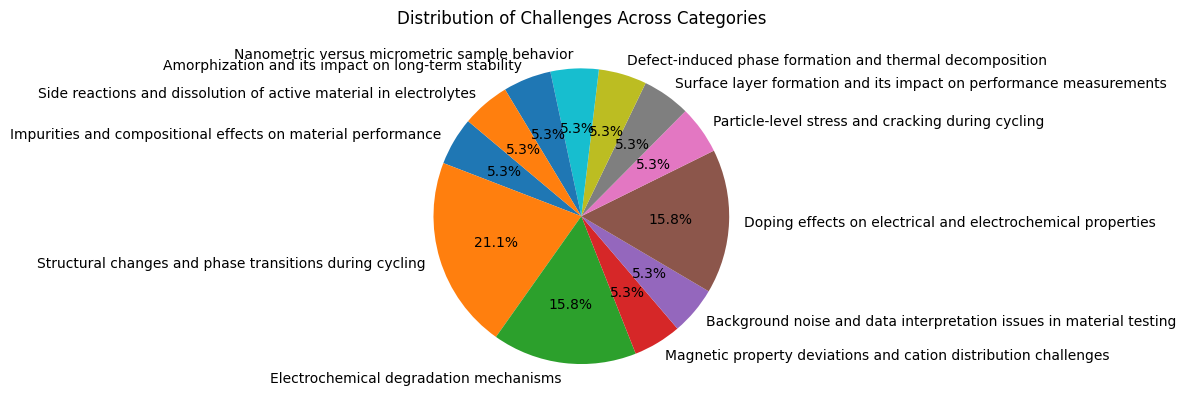

In [18]:
# Plot the pie chart
# Count the number of challenges in each category
category_counts = {category: len(challenges) for category, challenges in categorized_challenges.items()}
import matplotlib.pyplot as plt
plt.pie(category_counts.values(), labels=category_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Challenges Across Categories")
plt.show()

In [19]:
len(challenge_texts), len(solution_texts), len(challenge_texts_for_embedding)

# get the embeddings for the challenges
challenges_embeddings = get_embeddings(challenge_texts_for_embedding, AZURE_EMBEDDING_DEPLOYMENT_NAME)

In [20]:
# dimesional reduction using umap
import umap
import numpy as np
import matplotlib.pyplot as plt
import random


# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

# Convert the list of embeddings to a NumPy array
reducer = umap.UMAP(n_components=2, metric='cosine', random_state=42)
reduced_vectors_umap_challenges = reducer.fit_transform(challenges_embeddings)

/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [21]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, TapTool, CustomJS, Legend, LegendItem
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20
import pandas as pd

# Prepare the data for challenges
data = pd.DataFrame({
    "x": reduced_vectors_umap_challenges[:, 0],  # First dimension of reduced vectors
    "y": reduced_vectors_umap_challenges[:, 1],  # Second dimension of reduced vectors
    "text": challenge_texts_for_embedding,  # Combined text of challenges
    "category": [c.split(":")[0] for c in challenge_texts_for_embedding],  # Extract category from text
    "type": ["Challenge"] * len(challenge_texts_for_embedding),  # Type label
    "alpha": [0.8] * len(challenge_texts_for_embedding)  # Initialize alpha for dynamic visibility
})

# Create a ColumnDataSource for Bokeh
source = ColumnDataSource(data)
unique_categories = data["category"].unique().tolist()
palette = Category20[len(unique_categories)]
color_map = factor_cmap("category", palette=palette, factors=unique_categories)

# Create a square Bokeh figure
p = figure(title="2D Visualization of Challenges",
           x_axis_label="UMAP Dimension 1",
           y_axis_label="UMAP Dimension 2",
           tools="pan,wheel_zoom,box_zoom,reset,save,tap",
           width=1100, height=500)  # Keep plot square

# Scatter plot with color mapping
scatter = p.scatter("x", "y", source=source, size=10, color=color_map, fill_alpha="alpha", line_alpha="alpha")

# Create custom legend items by rendering each category separately
legend_items = []
for i, category in enumerate(unique_categories):
    color = palette[i]
    category_df = data[data["category"] == category]
    category_source = ColumnDataSource(category_df)
    renderer = p.scatter("x", "y", source=category_source, size=10, color=color, alpha=0.8)
    legend_items.append(LegendItem(label=category, renderers=[renderer]))

# Add hover tool to display text and type
hover = HoverTool(
    tooltips="""
        <div style="width: 300px;">
            <b>Category:</b> @category<br>
            <b>Type:</b> @type<br>
            <b></b><pre style="white-space: pre-wrap;">@text</pre>
        </div>
    """,
    point_policy="follow_mouse",
    renderers=[scatter]
)
p.add_tools(hover)

# Add TapTool with a CustomJS callback to filter points dynamically
callback = CustomJS(args=dict(source=source), code="""
    const indices = source.selected.indices;
    const data = source.data;
    const selectedIndex = indices[0];  // Get the first selected index

    if (selectedIndex !== undefined) {
        const selectedCategory = data['category'][selectedIndex];

        // Filter points to show only the selected category
        for (let i = 0; i < data['x'].length; i++) {
            if (data['category'][i] === selectedCategory) {
                data['alpha'][i] = 0.8;  // Show related points
            } else {
                data['alpha'][i] = 0.1;  // Dim unrelated points
            }
        }
    } else {
        // Reset all points if nothing is selected
        for (let i = 0; i < data['x'].length; i++) {
            data['alpha'][i] = 0.8;
        }
    }

    source.change.emit();
""")
p.add_tools(TapTool(callback=callback))

# Add the legend outside the plot
legend = Legend(items=legend_items, title="Categories", click_policy="hide")
p.add_layout(legend, 'right')  # Place legend outside but still part of plot layout

# Show plot
output_notebook()
show(p)

Loading BokehJS ...

In [22]:
len(challenge_texts_for_embedding)

19

# Catergorizing the solutions

In [26]:
import sys
from pathlib import Path
from pyprojroot import here

# Get the root directory of the project
root_dir = here()
print("Root directory:", root_dir)

# Add the parent directory (project root) to the Python path so 'prompts' can be imported
sys.path.append(str(root_dir))
print("Python path:", sys.path)

# Import the prompts
from prompts.solution_categorization import SOLUTION_COMBINED_PROMPT
from prompts.solution_categorization import SOLUTION_CATEGORY_IDENTIFICATION_PROMPT
from prompts.solution_categorization import SOLUTION_CATEGORIZATION_PROMPT



Root directory: /Users/arashkhajeh/GitHub/LLM-for-Materials
Python path: ['/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python312.zip', '/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12', '/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/lib-dynload', '', '/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages', '/Users/arashkhajeh/GitHub/MMMM/src', '/Users/arashkhajeh/GitHub/LLM-for-Materials', '/Users/arashkhajeh/GitHub/LLM-for-Materials']


In [28]:
import os
import json
from langchain_openai import ChatOpenAI, AzureChatOpenAI
from langchain_core.messages import HumanMessage, SystemMessage

def categorize_solutions(
                       solution_texts: list,
                       challenge_stage: str = "synthesis",
                       api_key: str = None,  
                       azure: bool = True, 
                       model_name: str = None, 
                       temp: float = 0, 
                       azure_api_version: str = None, 
                       azure_endpoint: str = None) -> json:
    """
    Categorize extracted solutions into different categories.

    Parameters:
        solution_texts (list): List of solutions to categorize.
        api_key (str): OpenAI API key.
        azure (bool): Flag to indicate if Azure OpenAI service should be used.
        model_name (str, optional): The name of the Azure deployment or openai model name. Defaults to None.
        temp (float, optional): The temperature for the model. Defaults to 0.   
        azure_api_version (str, optional): The API version for Azure OpenAI service. Defaults to None.
        azure_endpoint (str, optional): The endpoint for Azure OpenAI service. Defaults to None.
        azure_api_version (str): The API version for Azure OpenAI service. Defaults to None.
        
    Returns:
        json: JSON object containing the the categorized solutions.
    """
    if not azure:
        llm = ChatOpenAI(model_name=model_name or os.getenv("OPENAI_MODEL_NAME"),  # Replace with your OpenAI model name
                         temperature=temp, 
                         openai_api_key=api_key or os.getenv("OPENAI_API_KEY"))
    else:
        llm = AzureChatOpenAI(
            azure_deployment=model_name or os.getenv("AZURE_MODEL_DEPLOYMENT_NAME"),  # Replace with your Azure deployment name
            api_version=azure_api_version or os.getenv("AZURE_OPENAI_API_VERSION"),
            temperature=temp or 0,
            openai_api_key=api_key or os.getenv("AZURE_OPENAI_API_KEY"),
            azure_endpoint=azure_endpoint or os.getenv("AZURE_OPENAI_ENDPOINT")  # Explicitly pass the endpoint
        )

    solution_prompt = SOLUTION_COMBINED_PROMPT.format(
        solution_texts=solution_texts,
        challenge_stage=challenge_stage
    )
    system_msg = SystemMessage(content="You are a helpful and precise materials scientist. ")
    response = llm.invoke([
    system_msg,
    HumanMessage(content=solution_prompt)
    ])

    # Separate the JSON part of the response
    try:
        json_start = response.content.index("{")
        json_end = response.content.rindex("}") + 1
        json_str = response.content[json_start:json_end]
    except ValueError:
        raise ValueError("Failed to extract JSON from LLM response. Check the response format.")

    try:
        extracted_output = json.loads(json_str)
    except json.JSONDecodeError as e:
        raise ValueError(f"Failed to parse LLM response as JSON: {json_str}") from e

    return extracted_output


In [78]:
categorized_solutions = categorize_solutions(solution_texts=solution_texts,
                                             challenge_stage=challenge_stage,
                                   api_key=AZURE_OPENAI_API_KEY,
                                   azure=True,
                                   model_name=AZURE_MODEL_DEPLOYMENT_NAME,
                                   temp=0.0,
                                   azure_api_version=AZURE_OPENAI_API_VERSION,
                                   azure_endpoint=AZURE_OPENAI_ENDPOINT)
print("Categories:", categorized_solutions)
print("Num. of categories:", len(categorized_solutions))

Categories: {'Synthesis and Impurity Control': ['Minimizing Mn3O4 impurity through optimized synthesis conditions. Reducing reaction time and controlling precursor concentrations to limit Mn3O4 formation.'], 'Magnetic and Spin Behavior Analysis': ['Attributed to decreasing cooperative coupling effects due to reduced iron content and increasing influence of spin canting. Analysis of magnetic measurements and comparison with calculated MS values.'], 'Composition Optimization and Electrochemical Testing': ['Identification of x = 0.5 as the optimal composition to balance capacity and energy density. Electrochemical testing of various compositions (0 ≤ x ≤ 1) to determine the relationship between Co content and performance.'], 'Neutron-Compatible Cell Design': ['Designed a neutron-compatible electrochemical cell using deuterated electrolytes and glass fiber separators to reduce hydrogen scattering. Replaced conventional components with deuterated EC/DMC electrolyte and glass fiber separator

In [79]:
output_file_path = os.path.join(data_dir, "clustering-results", f"categorized_solutions_{challenge_stage}.json")
evaluate_and_save_categorized_items(text_items=solution_texts, categorized_items=categorized_solutions, output_file_path=output_file_path)


Num. of missing items: 0
Missing items: []
Duplicates: {}


# Categorizing Solutions in Two Steps

In [27]:
import os
import json
from langchain_openai import ChatOpenAI, AzureChatOpenAI
from langchain_core.messages import HumanMessage, SystemMessage

def identify_solution_categories(
                       solution_texts: list,
                       challenge_stage: str = "synthesis",
                       api_key: str = None,  
                       azure: bool = True, 
                       model_name: str = None, 
                       temp: float = 0, 
                       azure_api_version: str = None, 
                       azure_endpoint: str = None) -> json:
    """
    Make categories from list of solutions.

    Parameters:
        solutions_text (list): List of solutions to categorize.
        api_key (str): OpenAI API key.
        azure (bool): Flag to indicate if Azure OpenAI service should be used.
        model_name (str, optional): The name of the Azure deployment or openai model name. Defaults to None.
        temp (float, optional): The temperature for the model. Defaults to 0.   
        azure_api_version (str, optional): The API version for Azure OpenAI service. Defaults to None.
        azure_endpoint (str, optional): The endpoint for Azure OpenAI service. Defaults to None.
        azure_api_version (str): The API version for Azure OpenAI service. Defaults to None.
        
    Returns:
        json: JSON object containing the the categorized solutions.
    """
    if not azure:
        llm = ChatOpenAI(model_name=model_name or os.getenv("OPENAI_MODEL_NAME"),  # Replace with your OpenAI model name
                         temperature=temp, 
                         openai_api_key=api_key or os.getenv("OPENAI_API_KEY"))
    else:
        llm = AzureChatOpenAI(
            azure_deployment=model_name or os.getenv("AZURE_MODEL_DEPLOYMENT_NAME"),  # Replace with your Azure deployment name
            api_version=azure_api_version or os.getenv("AZURE_OPENAI_API_VERSION"),
            temperature=temp or 0,
            openai_api_key=api_key or os.getenv("AZURE_OPENAI_API_KEY"),
            azure_endpoint=azure_endpoint or os.getenv("AZURE_OPENAI_ENDPOINT")  # Explicitly pass the endpoint
        )

    solutions_prompt = SOLUTION_CATEGORY_IDENTIFICATION_PROMPT.format(
        solution_texts=solution_texts,
        challenge_stage=challenge_stage
    )
    # solutions_prompt = SOLUTION_CATEGORIZATION_PROMPT.format(
    system_msg = SystemMessage(content="You are a helpful and precise materials scientist. ")
    response = llm.invoke([
    system_msg,
    HumanMessage(content=solutions_prompt)
    ])

    # Separate the JSON part of the response
    try:
        json_start = response.content.index("{")
        json_end = response.content.rindex("}") + 1
        json_str = response.content[json_start:json_end]
    except ValueError:
        raise ValueError("Failed to extract JSON from LLM response. Check the response format.")

    try:
        extracted_output = json.loads(json_str)
    except json.JSONDecodeError as e:
        raise ValueError(f"Failed to parse LLM response as JSON: {json_str}") from e

    return extracted_output


In [28]:
import os
import json
from langchain_openai import ChatOpenAI, AzureChatOpenAI
from langchain_core.messages import HumanMessage, SystemMessage

def categorize_solutions(
                       solution_texts: list,
                       challenge_stage: str = "synthesis",
                       solution_categories: list = None,
                       api_key: str = None,  
                       azure: bool = True, 
                       model_name: str = None, 
                       temp: float = 0, 
                       azure_api_version: str = None, 
                       azure_endpoint: str = None) -> json:
    """
    Categorize extracted solutions into different categories.

    Parameters:
        solutions_text (list): List of solutions to categorize.
        challenge_stage (str): The stage of the challenges (e.g., "synthesis", "characterization").
        solution_categories (list): List of categories to use for categorization.
        api_key (str): OpenAI API key.
        azure (bool): Flag to indicate if Azure OpenAI service should be used.
        model_name (str, optional): The name of the Azure deployment or openai model name. Defaults to None.
        temp (float, optional): The temperature for the model. Defaults to 0.   
        azure_api_version (str, optional): The API version for Azure OpenAI service. Defaults to None.
        azure_endpoint (str, optional): The endpoint for Azure OpenAI service. Defaults to None.
        azure_api_version (str): The API version for Azure OpenAI service. Defaults to None.
        
    Returns:
        json: JSON object containing the the categorized challenges.
    """
    if not azure:
        llm = ChatOpenAI(model_name=model_name or os.getenv("OPENAI_MODEL_NAME"),  # Replace with your OpenAI model name
                         temperature=temp, 
                         openai_api_key=api_key or os.getenv("OPENAI_API_KEY"))
    else:
        llm = AzureChatOpenAI(
            azure_deployment=model_name or os.getenv("AZURE_MODEL_DEPLOYMENT_NAME"),  # Replace with your Azure deployment name
            api_version=azure_api_version or os.getenv("AZURE_OPENAI_API_VERSION"),
            temperature=temp or 0,
            openai_api_key=api_key or os.getenv("AZURE_OPENAI_API_KEY"),
            azure_endpoint=azure_endpoint or os.getenv("AZURE_OPENAI_ENDPOINT")  # Explicitly pass the endpoint
        )

    solutions_prompt = SOLUTION_CATEGORIZATION_PROMPT.format(
        solution_texts=solution_texts,
        challenge_stage=challenge_stage,
        solution_categories=solution_categories
    )
    system_msg = SystemMessage(content="You are a helpful and precise materials scientist. ")
    response = llm.invoke([
    system_msg,
    HumanMessage(content=solutions_prompt)
    ])

    # Separate the JSON part of the response
    try:
        json_start = response.content.index("{")
        json_end = response.content.rindex("}") + 1
        json_str = response.content[json_start:json_end]
    except ValueError:
        raise ValueError("Failed to extract JSON from LLM response. Check the response format.")

    try:
        extracted_output = json.loads(json_str)
    except json.JSONDecodeError as e:
        raise ValueError(f"Failed to parse LLM response as JSON: {json_str}") from e

    return extracted_output

In [29]:

# Identify the categories of solutions
solution_categories = identify_solution_categories(solution_texts=solution_texts,
                                               challenge_stage=challenge_stage,
                                            api_key=AZURE_OPENAI_API_KEY,
                                            azure=True,
                                            model_name=AZURE_MODEL_DEPLOYMENT_NAME,
                                            temp=0.0,
                                            azure_api_version=AZURE_OPENAI_API_VERSION,
                                            azure_endpoint=AZURE_OPENAI_ENDPOINT)
print("Categories:", solution_categories)
print("Num. of categories:", len(solution_categories["Categories"]))

Categories: {'Categories': ['Impurity minimization and synthesis optimization', 'Magnetic property analysis and spin behavior', 'Electrochemical performance testing and composition optimization', 'Neutron-compatible cell design and hydrogen scattering reduction', 'Phase transformation and structural evolution monitoring', 'Operando techniques for phase and structural analysis', 'Structural stability and electrical conductivity optimization', 'Cycle-induced phase formation and capacity retention', 'Particle size and defect influence on structural behavior', 'Electrode surface area and particle size optimization', 'Doping and substitution for structural stabilization', 'Diffraction pattern analysis and phase identification', 'Surface layer formation and analysis techniques', 'Catalyst characterization before and after stability testing', 'Surface coating for dissolution mitigation and stability improvement', 'Transition metal substitution to reduce distortion and improve stability']}
Num

In [30]:
# Categorize the challenges based on the identified categories
list_of_solution_categories = solution_categories.get("Categories", [])
categorized_solutions = categorize_solutions(solution_texts=solution_texts,
                                               challenge_stage=challenge_stage,
                                               solution_categories=list_of_solution_categories,
                                                api_key=AZURE_OPENAI_API_KEY,
                                                azure=True,
                                                model_name=AZURE_MODEL_DEPLOYMENT_NAME,
                                                temp=0.0,
                                                azure_api_version=AZURE_OPENAI_API_VERSION,
                                                azure_endpoint=AZURE_OPENAI_ENDPOINT)
print("Categories:", categorized_solutions)
print("Num. of categories:", len(categorized_solutions))

Categories: {'Impurity minimization and synthesis optimization': ['Minimizing Mn3O4 impurity through optimized synthesis conditions. Reducing reaction time and controlling precursor concentrations to limit Mn3O4 formation.'], 'Magnetic property analysis and spin behavior': ['Attributed to decreasing cooperative coupling effects due to reduced iron content and increasing influence of spin canting. Analysis of magnetic measurements and comparison with calculated MS values.'], 'Electrochemical performance testing and composition optimization': ['Identification of x = 0.5 as the optimal composition to balance capacity and energy density. Electrochemical testing of various compositions (0 ≤ x ≤ 1) to determine the relationship between Co content and performance.'], 'Neutron-compatible cell design and hydrogen scattering reduction': ['Designed a neutron-compatible electrochemical cell using deuterated electrolytes and glass fiber separators to reduce hydrogen scattering. Replaced conventiona

In [31]:
output_file_path = os.path.join(data_dir, "clustering-results", f"categorized_solutions_{challenge_stage}.json")
evaluate_and_save_categorized_items(text_items=solution_texts, categorized_items=categorized_solutions, output_file_path=output_file_path)


Num. of missing items: 0
Missing items: []
Duplicates: {}


# Visualizing solutions

In [32]:
# Load the categorized solutions from the JSON file
output_file = os.path.join(data_dir, "clustering-results",f"categorized_solutions_{challenge_stage}.json")
with open(output_file, "r", encoding="utf-8") as f:
    categorized_solutions = json.load(f)

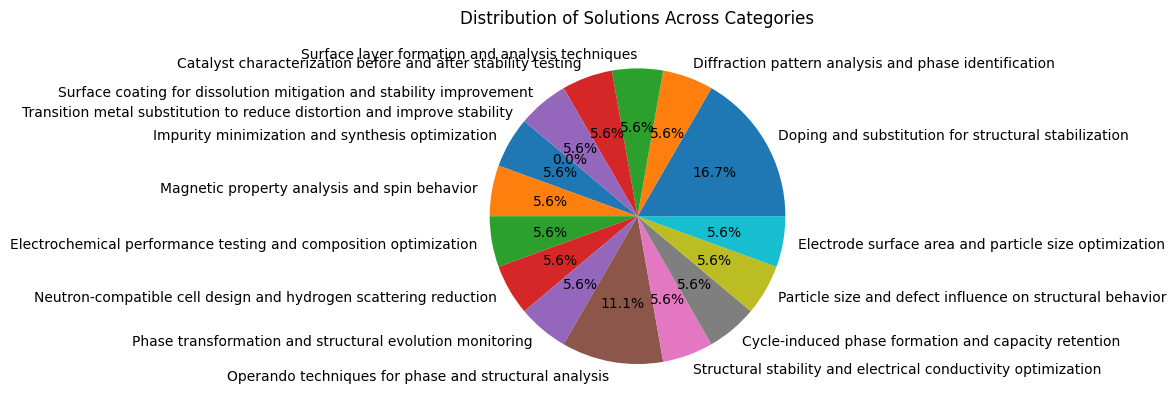

In [33]:
# Plot the pie chart
# Count the number of solutions in each category
category_counts = {category: len(solutions) for category, solutions in categorized_solutions.items()}
import matplotlib.pyplot as plt
plt.pie(category_counts.values(), labels=category_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Solutions Across Categories")
plt.show()

In [34]:
solution_texts_for_embedding = []

for solution in solution_texts:
    # find catergory for the solution from list of categories
    for category, solutions in categorized_solutions.items():
        if solution in solutions:

            # append the solution text and category to the list
            category_solution = f"{category}: {solution}"
            solution_texts_for_embedding.append(category_solution)

print(solution_texts_for_embedding)

['Impurity minimization and synthesis optimization: Minimizing Mn3O4 impurity through optimized synthesis conditions. Reducing reaction time and controlling precursor concentrations to limit Mn3O4 formation.', 'Magnetic property analysis and spin behavior: Attributed to decreasing cooperative coupling effects due to reduced iron content and increasing influence of spin canting. Analysis of magnetic measurements and comparison with calculated MS values.', 'Electrochemical performance testing and composition optimization: Identification of x = 0.5 as the optimal composition to balance capacity and energy density. Electrochemical testing of various compositions (0 ≤ x ≤ 1) to determine the relationship between Co content and performance.', 'Neutron-compatible cell design and hydrogen scattering reduction: Designed a neutron-compatible electrochemical cell using deuterated electrolytes and glass fiber separators to reduce hydrogen scattering. Replaced conventional components with deuterate

In [35]:
solution_texts_for_embedding, len(solution_texts_for_embedding)

(['Impurity minimization and synthesis optimization: Minimizing Mn3O4 impurity through optimized synthesis conditions. Reducing reaction time and controlling precursor concentrations to limit Mn3O4 formation.',
  'Magnetic property analysis and spin behavior: Attributed to decreasing cooperative coupling effects due to reduced iron content and increasing influence of spin canting. Analysis of magnetic measurements and comparison with calculated MS values.',
  'Electrochemical performance testing and composition optimization: Identification of x = 0.5 as the optimal composition to balance capacity and energy density. Electrochemical testing of various compositions (0 ≤ x ≤ 1) to determine the relationship between Co content and performance.',
  'Neutron-compatible cell design and hydrogen scattering reduction: Designed a neutron-compatible electrochemical cell using deuterated electrolytes and glass fiber separators to reduce hydrogen scattering. Replaced conventional components with de

In [36]:
# get the embeddings for the solutions
solutions_embeddings = get_embeddings(solution_texts_for_embedding, AZURE_EMBEDDING_DEPLOYMENT_NAME)


In [37]:
# dimesional reduction using umap
import umap
import numpy as np
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

# Convert the list of embeddings to a NumPy array
reducer = umap.UMAP(n_components=2, metric='cosine', random_state=42)
reduced_vectors_umap_solutions = reducer.fit_transform(solutions_embeddings)

/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [38]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, TapTool, CustomJS, Legend, LegendItem
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20
import pandas as pd

# Prepare the data for challenges
data = pd.DataFrame({
    "x": reduced_vectors_umap_solutions[:, 0],  # First dimension of reduced vectors
    "y": reduced_vectors_umap_solutions[:, 1],  # Second dimension of reduced vectors
    "text": solution_texts_for_embedding,  # Combined text of solutions
    "category": [c.split(":")[0] for c in solution_texts_for_embedding],  # Extract category from text
    "type": ["Solution"] * len(solution_texts_for_embedding),  # Type label
    "alpha": [0.8] * len(solution_texts_for_embedding)  # Initialize alpha for dynamic visibility
})

# Create a ColumnDataSource for Bokeh
source = ColumnDataSource(data)
unique_categories = data["category"].unique().tolist()
palette = Category20[len(unique_categories)]
color_map = factor_cmap("category", palette=palette, factors=unique_categories)

# Create a square Bokeh figure
p = figure(title="2D Visualization of Solutions",
           x_axis_label="UMAP Dimension 1",
           y_axis_label="UMAP Dimension 2",
           tools="pan,wheel_zoom,box_zoom,reset,save,tap",
           width=1100, height=500)  # Keep plot square

# Scatter plot with color mapping
scatter = p.scatter("x", "y", source=source, size=10, color=color_map, fill_alpha="alpha", line_alpha="alpha")

# Create custom legend items by rendering each category separately
legend_items = []
for i, category in enumerate(unique_categories):
    color = palette[i]
    category_df = data[data["category"] == category]
    category_source = ColumnDataSource(category_df)
    renderer = p.scatter("x", "y", source=category_source, size=10, color=color, alpha=0.8)
    legend_items.append(LegendItem(label=category, renderers=[renderer]))

# Add hover tool to display text and type
hover = HoverTool(
    tooltips="""
        <div style="width: 300px;">
            <b>Category:</b> @category<br>
            <b>Type:</b> @type<br>
            <b></b><pre style="white-space: pre-wrap;">@text</pre>
        </div>
    """,
    point_policy="follow_mouse",
    renderers=[scatter]
)
p.add_tools(hover)

# Add TapTool with a CustomJS callback to filter points dynamically
callback = CustomJS(args=dict(source=source), code="""
    const indices = source.selected.indices;
    const data = source.data;
    const selectedIndex = indices[0];  // Get the first selected index

    if (selectedIndex !== undefined) {
        const selectedCategory = data['category'][selectedIndex];

        // Filter points to show only the selected category
        for (let i = 0; i < data['x'].length; i++) {
            if (data['category'][i] === selectedCategory) {
                data['alpha'][i] = 0.8;  // Show related points
            } else {
                data['alpha'][i] = 0.1;  // Dim unrelated points
            }
        }
    } else {
        // Reset all points if nothing is selected
        for (let i = 0; i < data['x'].length; i++) {
            data['alpha'][i] = 0.8;
        }
    }

    source.change.emit();
""")
p.add_tools(TapTool(callback=callback))

# Add the legend outside the plot
legend = Legend(items=legend_items, title="Categories", click_policy="hide")
p.add_layout(legend, 'right')  # Place legend outside but still part of plot layout

# Show plot
output_notebook()
show(p)

Loading BokehJS ...

# Visualize both challenges and solutions in the same plot

In [39]:
# Make embeddings for the challenges and solutions
# Make a unify list of challenges and solutions
challenges_and_solutions = challenge_texts + solution_texts
# get the embeddings for the challenges and solutions
challenges_and_solutions_embeddings = get_embeddings(challenges_and_solutions, AZURE_EMBEDDING_DEPLOYMENT_NAME)
# dimesional reduction using umap
import umap
import numpy as np
import matplotlib.pyplot as plt
# Convert the list of embeddings to a NumPy array
reducer = umap.UMAP(n_components=2, metric='cosine', random_state=42)
reduced_vectors_umap = reducer.fit_transform(challenges_and_solutions_embeddings)



/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [40]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category20
import pandas as pd
import textwrap



# Prepare the data for challenges and solutions
data = pd.DataFrame({
    "x": reduced_vectors_umap[:, 0],  # First dimension of reduced vectors
    "y": reduced_vectors_umap[:, 1],  # Second dimension of reduced vectors
    "text": challenges_and_solutions,  # Combined text of challenges and solutions
    "type": ["Challenge"] * len(challenge_texts) + ["Solution"] * len(solution_texts)  # Type label
})

# Create a ColumnDataSource for Bokeh
source = ColumnDataSource(data)

# Create a Bokeh figure
p = figure(title="2D Visualization of Challenges and Solutions",
           x_axis_label="UMAP Dimension 1",
           y_axis_label="UMAP Dimension 2",
           tools="pan,wheel_zoom,box_zoom,reset,save",
           width=550, height=500)

# Add scatter points for challenges and solutions
palette = ["#1f77b4", "#ff7f0e"]  # Two colors for challenges and solutions
scatter = p.scatter(x="x", y="y", 
                    source=source, 
                    size=10, 
                    color=factor_cmap("type", palette=palette, 
                                      factors=["Challenge", "Solution"]), 
                                      alpha=0.8, legend_field="type")

# Add lines connecting challenges to their corresponding solutions
for i in range(len(challenge_texts)):
    p.line(
        x=[reduced_vectors_umap[i, 0], reduced_vectors_umap[len(challenge_texts) + i, 0]],
        y=[reduced_vectors_umap[i, 1], reduced_vectors_umap[len(challenge_texts) + i, 1]],
        line_width=1,
        color="gray",
        alpha=0.5
    )

# Add hover tool to display text and type
hover = HoverTool(
    tooltips="""
        <div style="width: 300px;">
            <b>Type:</b> @type<br>
            <b></b><pre style="white-space: pre-wrap;">@text</pre>
        </div>
    """,
    point_policy="follow_mouse",
    renderers=[scatter]
)
p.add_tools(hover)

# Customize the legend
p.legend.title = "Type"
p.legend.location = "top_right"
p.legend.click_policy = "hide"  # Allow toggling visibility of points by type

# Show the plot
output_notebook()
show(p)

Loading BokehJS ...

In [41]:
# with added categories

# Make embeddings for the challenges and solutions
# Make a unify list of challenges and solutions
challenges_and_solutions = challenge_texts_for_embedding + solution_texts_for_embedding
# get the embeddings for the challenges and solutions
challenges_and_solutions_embeddings = get_embeddings(challenges_and_solutions, AZURE_EMBEDDING_DEPLOYMENT_NAME)
# dimesional reduction using umap
import umap
import numpy as np
import matplotlib.pyplot as plt
# Convert the list of embeddings to a NumPy array
reducer = umap.UMAP(n_components=2, metric='cosine', random_state=42)
reduced_vectors_umap = reducer.fit_transform(challenges_and_solutions_embeddings)


/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/arashkhajeh/.pyenv/versions/3.12.0/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [42]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category20
import pandas as pd
import textwrap



# Prepare the data for challenges and solutions
data = pd.DataFrame({
    "x": reduced_vectors_umap[:, 0],  # First dimension of reduced vectors
    "y": reduced_vectors_umap[:, 1],  # Second dimension of reduced vectors
    "text": challenges_and_solutions,  # Combined text of challenges and solutions
    "type": ["Challenge"] * len(challenge_texts_for_embedding) + ["Solution"] * len(solution_texts_for_embedding)  # Type label
})

# Create a ColumnDataSource for Bokeh
source = ColumnDataSource(data)

# Create a Bokeh figure
p = figure(title="2D Visualization of Challenges and Solutions",
           x_axis_label="UMAP Dimension 1",
           y_axis_label="UMAP Dimension 2",
           tools="pan,wheel_zoom,box_zoom,reset,save",
           width=550, height=500)

# Add scatter points for challenges and solutions
palette = ["#1f77b4", "#ff7f0e"]  # Two colors for challenges and solutions

scatter = p.scatter(x="x", y="y", 
                    source=source, 
                    size=10, 
                    color=factor_cmap("type", palette=palette, 
                                      factors=["Challenge", "Solution"]), 
                                      alpha=0.8, legend_field="type")

# Add lines connecting challenges to their corresponding solutions
num_challenges = len(challenge_texts_for_embedding)
num_solutions = len(solution_texts_for_embedding)
num_pairs = min(num_challenges, num_solutions, reduced_vectors_umap.shape[0] // 2)

for i in range(num_pairs):
    challenge_idx = i
    solution_idx = num_challenges + i
    if solution_idx < reduced_vectors_umap.shape[0]:
        p.line(
            x=[reduced_vectors_umap[challenge_idx, 0], reduced_vectors_umap[solution_idx, 0]],
            y=[reduced_vectors_umap[challenge_idx, 1], reduced_vectors_umap[solution_idx, 1]],
            line_width=1,
            color="gray",
            alpha=0.5
        )

# Add hover tool to display text and type
hover = HoverTool(
    tooltips="""
        <div style="width: 300px;">
            <b>Type:</b> @type<br>
            <b></b><pre style="white-space: pre-wrap;">@text</pre>
        </div>
    """,
    point_policy="follow_mouse",
    renderers=[scatter]
)
p.add_tools(hover)

# Customize the legend
p.legend.title = "Type"
p.legend.location = "top_right"
p.legend.click_policy = "hide"  # Allow toggling visibility of points by type

# Show the plot
output_notebook()
show(p)

Loading BokehJS ...

In [43]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, TapTool, CustomJS
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20
import pandas as pd

# Prepare the data for challenges and solutions
data = pd.DataFrame({
    "x": reduced_vectors_umap[:, 0],  # First dimension of reduced vectors
    "y": reduced_vectors_umap[:, 1],  # Second dimension of reduced vectors
    "text": challenges_and_solutions,  # Combined text of challenges and solutions
    "type": ["Challenge"] * len(challenge_texts_for_embedding) + ["Solution"] * len(solution_texts_for_embedding),  # Type label
    "index": list(range(len(challenges_and_solutions)))  # Add an index column for filtering
})

# Initialize alpha values in the DataFrame before converting to source
data['alpha'] = [0.8] * len(data)

# Create a ColumnDataSource for Bokeh
source = ColumnDataSource(data)

# Create a Bokeh figure
p = figure(title="2D Visualization of Challenges and Solutions",
           x_axis_label="UMAP Dimension 1",
           y_axis_label="UMAP Dimension 2",
           tools="pan,wheel_zoom,box_zoom,reset,save,tap",
           width=550, height=500)

# Add scatter points for challenges and solutions
palette = ["#1f77b4", "#ff7f0e"]  # Two colors for challenges and solutions
# Create the scatter plot with dynamic alpha

from bokeh.models import Circle

# Set color mapping manually
color_map = factor_cmap("type", palette=palette, factors=["Challenge", "Solution"])

scatter = p.add_glyph(
    source,
    Circle(
        x="x", y="y", radius=0.15,
        fill_color=color_map,
        line_color=color_map,
        fill_alpha="alpha",
        line_alpha="alpha"
    )
)

# Add lines connecting challenges to their corresponding solutions
num_challenges = len(challenge_texts_for_embedding)
num_solutions = len(solution_texts_for_embedding)
num_pairs = min(num_challenges, num_solutions, reduced_vectors_umap.shape[0] // 2)

for i in range(num_pairs):
    challenge_idx = i
    solution_idx = num_challenges + i
    if solution_idx < reduced_vectors_umap.shape[0]:
        p.line(
            x=[reduced_vectors_umap[challenge_idx, 0], reduced_vectors_umap[solution_idx, 0]],
            y=[reduced_vectors_umap[challenge_idx, 1], reduced_vectors_umap[solution_idx, 1]],
            line_width=1,
            color="gray",
            alpha=0.5
        )

# Add hover tool to display text and type
hover = HoverTool(
    tooltips="""
        <div style="width: 300px;">
            <b>Type:</b> @type<br>
            <b></b><pre style="white-space: pre-wrap;">@text</pre>
        </div>
    """,
    point_policy="follow_mouse",
    renderers=[scatter]
)
p.add_tools(hover)

# Add TapTool with a CustomJS callback to filter points
callback = CustomJS(args=dict(source=source, num_challenges=num_challenges), code="""
    const indices = source.selected.indices;
    const data = source.data;
    const selectedIndex = indices[0];  // Get the first selected index

    if (selectedIndex !== undefined) {
        const selectedType = data['type'][selectedIndex];

        // Determine the related index (challenge <-> solution)
        let relatedIndex = null;
        if (selectedType === "Challenge") {
            relatedIndex = selectedIndex + num_challenges;
        } else if (selectedType === "Solution") {
            relatedIndex = selectedIndex - num_challenges;
        }

        // Filter points to show only the selected point and its related point
        for (let i = 0; i < data['x'].length; i++) {
            if (i === selectedIndex || i === relatedIndex) {
                data['alpha'][i] = 0.8;  // Show related points
            } else {
                data['alpha'][i] = 0.1;  // Dim unrelated points
            }
        }
    } else {
        // Reset all points if nothing is selected
        for (let i = 0; i < data['x'].length; i++) {
            data['alpha'][i] = 0.8;
        }
    }

    source.change.emit();
""")

# source.data['alpha'] = [0.8] * len(data)  # Initialize alpha values
# scatter.glyph.fill_alpha = 'alpha'        # Correct binding
# scatter.glyph.line_alpha = 'alpha'  # Bind alpha to the data source
p.add_tools(TapTool(callback=callback))

# Customize the legend
p.legend.title = "Type"
p.legend.location = "top_right"
p.legend.click_policy = "hide"  # Allow toggling visibility of points by type

# Show the plot
output_notebook()
show(p)

/var/folders/p1/_xzph12174z0rlnng642dchm0000gq/T/ipykernel_45509/1372459620.py:120: UserWarning: 
You are attempting to set `plot.legend.title` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  p.legend.title = "Type"
/var/folders/p1/_xzph12174z0rlnng642dchm0000gq/T/ipykernel_45509/1372459620.py:121: UserWarning: 
You are attempting to set `plot.legend.location` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  p.legend.location = "top_right"
/var/folders/p1/_xzph12174z0rlnng642dchm0000gq/T/ipykernel_45509/1372459620.py:122: UserWarning: 
You are attempting to set `plot.legend.click_policy` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a 

Loading BokehJS ...

In [44]:
# Next steps:

# 1. Map of solutions and challenges during characterization, testing, etc.
# 2. Can we predict a solution for a new challenge based on the neighboring challenges and existing solutions?
# 3. If yes, how confident are we in the predicted solutions? Can we quantify the uncertainty?
# Can we convert a vector embedding to a text description reprenting a solution?
# 4. Can we use the embeddings to find similar challenges and solutions in other (similar) materials?